In [1]:
from qiskit import IBMQ, QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.compiler import transpile, assemble
#from qiskit.result import Result
#from qiskit.pulse import DriveChannel, ControlChannel, MeasureChannel, AcquireChannel, Play, Schedule
#from qiskit.ignis.mitigation import complete_meas_cal, CompleteMeasFitter
#from qiskit.ignis.characterization import t1_circuits, T1Fitter
from qiskit.visualization import plot_histogram
#style = SchedStyle(figsize=(5, 5))

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5, 5]

#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
#backend = provider.get_backend('ibmq_athens')

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-university', group='uni-pittsburgh', project='main')
backend = provider.get_backend('ibmq_casablanca')

C:\Users\jsten\Anaconda3\envs\qiskit20_new\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [4]:
qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(3, name='c')
qc = QuantumCircuit(qr, cr)
qc.reset([0,1])
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.barrier()
qc.cx(0, 1)
qc.h(1)
qc.measure(0, 1)
qc.measure(1, 2)
qc.draw()

┌───┐     ┌─┐ ░           ┌─┐   
q_0: ─|0>─┤ H ├──■──┤M├─░───■───────┤M├───
          └───┘┌─┴─┐└╥┘ ░ ┌─┴─┐┌───┐└╥┘┌─┐
q_1: ─|0>──────┤ X ├─╫──░─┤ X ├┤ H ├─╫─┤M├
               └───┘ ║  ░ └───┘└───┘ ║ └╥┘
c: 3/════════════════╩═══════════════╩══╩═
                     0               1  2

In [5]:
qobj = assemble(transpile(qc, backend=backend), backend=backend, shots=2056)

In [6]:
# RUN the job on a real device
job = backend.run(qobj)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

#test_job = backend.retrieve_job('602594471bf5883dd23ccd60')
#job = test_job

602e7d99ded5efbca88fa678
Job Status: job has successfully run


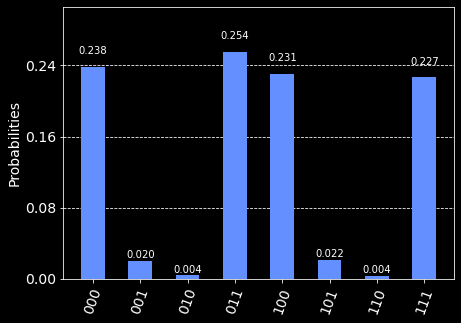

In [7]:
plot_histogram(job.result().get_counts())

In [8]:
open_provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend_open = open_provider.get_backend('ibmq_santiago')

In [9]:
qobj_open = assemble(transpile(qc, backend=backend_open), backend=backend_open, shots=2056)

In [10]:
# RUN the job on a real device
openjob = backend.run(qobj_open)
print(openjob.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(openjob)

#test_job_internal = backend.retrieve_job('6025956c3b605bfb29a19a39')
#test_job_open = backend.retrieve_job('6025972fe76a4537b27247fd')
#job = test_job_open

602e7eb8baf41cdf43fdb66b
Job Status: job has successfully run


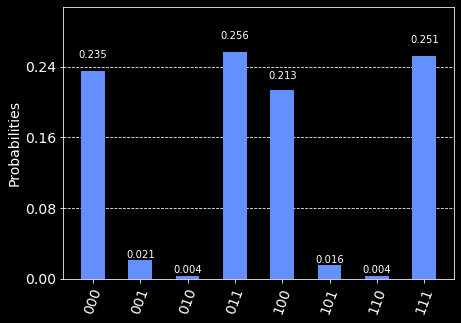

In [11]:
plot_histogram(openjob.result().get_counts())

In [12]:
from qiskit.providers.ibmq import least_busy
least_busy(open_provider.backends())

<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
open_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]